In [49]:
#source: https://stackoverflow.com/questions/55535226/how-to-make-a-correlation-plot-with-a-certain-lag-of-two-time-series

# Import Libraries
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as ss

#import os;
#path="."
#os.chdir(path)
#os.getcwd()

#Variables
#dataset=np.loadtxt("https://raw.githubusercontent.com/WahaTech/Data/main/BTC-PX-Difficulty.csv?token=GHSAT0AAAAAABUNYF7FBEF46PXBX32PXPIGYT5KY4A", delimiter=",")
#import pandas as pd

#df = pd.read_csv ("Data/BTC-PX-Difficulty.csv")
df = pd.read_csv('https://raw.githubusercontent.com/WahaTech/Data/main/BTC-PX-Difficulty.csv?token=GHSAT0AAAAAABUNYF7EZNSMUTO4UM3WZCX4YT5LAIA')
dataset = df.to_numpy()

#print (df)
x=dataset[-(365*4):,2]
y=dataset[-(365*4):,3]

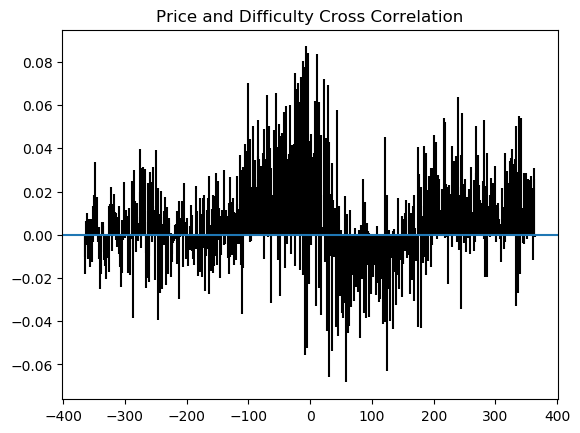

In [121]:
Lag_period_years = 5
x_lag=dataset[-(365*Lag_period_years):,2]/np.roll(dataset[-(365*Lag_period_years):,2], -1) - 1
y_lag=dataset[-(365*Lag_period_years):,3]/np.roll(dataset[-(365*Lag_period_years):,3], -1) - 1
x_lag=x_lag[:-1]
y_lag=y_lag[:-1]

plt.xcorr(x_lag, y_lag, normed=True, usevlines=True, maxlags=365)
plt.title("Price and Difficulty Cross Correlation")
plt.show()


In [108]:
y_lag

array([-0.000498782105691431, -0.01800029268208314, 0.0, ...,
       -0.0009577390469023284, -0.04569858631923163, 148.2032947860115],
      dtype=object)

In [ ]:
x

In [51]:
y

array([209453158595, 209557682217, 213398925331, ..., 29794407589312,
       29822970212379, 31251101365711], dtype=object)

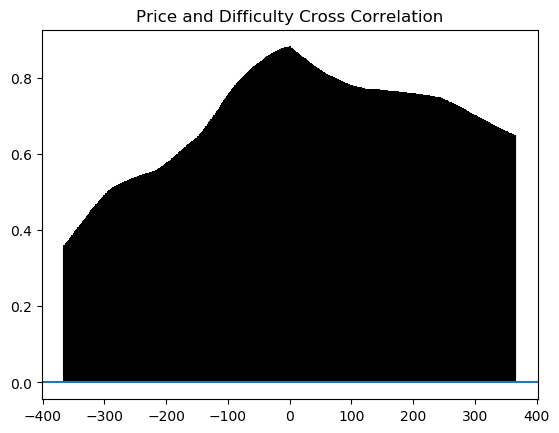

In [52]:
plt.xcorr(x, y, normed=True, usevlines=True, maxlags=365)
plt.title("Price and Difficulty Cross Correlation")
plt.show()

In [100]:
import statsmodels.api as sm
marketing = x
revenue = y

#calculate cross correlation
correl=sm.tsa.stattools.ccf(marketing, revenue)

In [101]:
correl

array([ 0.74718378,  0.74526561,  0.74340813, ..., -1.12520945,
       -1.02126978, -1.05828563])

array([-0.000498782105691431, -0.01800029268208314, 0.0, ..., 0.0,
       -0.0009577390469023284, -0.04569858631923163], dtype=object)

Pandas computed Pearson r: 0.7471837805755277
Scipy computed Pearson r: 0.7471837805755301 and p-value: 5.701011974766251e-261


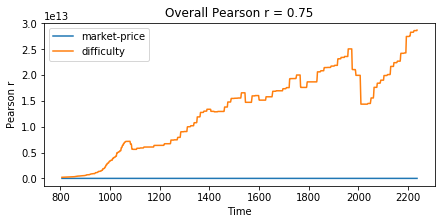

In [146]:
#Source: https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#sample code
#df = pd.read_csv('https://gist.githubusercontent.com/jcheong0428/c6d6111ee1b469cf39683bd70fab1c93/raw/b2546c195e6793e00ed23c97a982ce439f4f95aa/synchrony_sample.csv')
Lag_period_years = 4
#todo: @justin - can we please move this to a fixed link, perhaps something like ",/BTC-PX-Difficulty.csv"

df = pd.read_csv('https://raw.githubusercontent.com/WahaTech/Data/main/BTC-PX-Difficulty.csv?token=GHSAT0AAAAAABUNYF7FY2DUI5FEKPKBXCDEYT5MMIA')
df = df.iloc[-(365*Lag_period_years):, [2,3]]

overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(df.dropna()['market-price'], df.dropna()['difficulty'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

#todo: @justin - can we move these two separate axes, please? 

Text(0.5, 0.98, 'Smiling data and rolling window correlation')

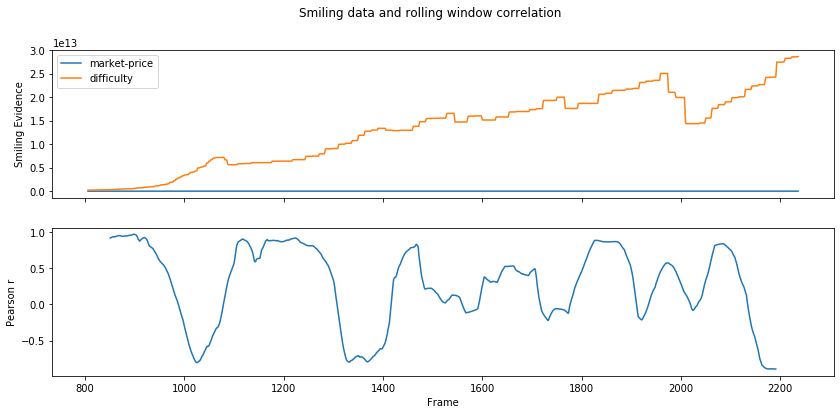

In [147]:
# Set window size to compute moving window synchrony.
r_window_size = 120
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['market-price'].rolling(window=r_window_size, center=True).corr(df_interpolated['difficulty'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")

Text(0, 0.5, 'values')

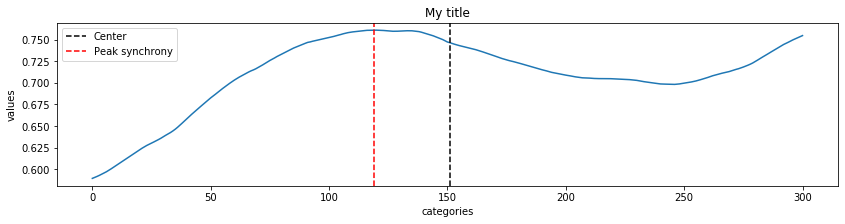

In [156]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['market-price']
d2 = df['difficulty']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
#ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
#ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
#ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()
plt.title('BTC Price vs Difficulty - Correlation ')
plt.xlabel('categories')
plt.ylabel('values')